In [ ]:
from google.colab import files

# Upload your 10 CSV files manually
uploaded = files.upload()


Saving Costco.csv to Costco.csv
Saving Amgen.csv to Amgen.csv
Saving Starbucks.csv to Starbucks.csv
Saving Tesla.csv to Tesla.csv
Saving Meta.csv to Meta.csv
Saving Netflix.csv to Netflix.csv
Saving Amazon.csv to Amazon.csv
Saving Google.csv to Google.csv
Saving Microsoft.csv to Microsoft.csv
Saving Apple.csv to Apple.csv


In [ ]:
import pandas as pd

# Map file names to their stock tickers
file_map = {
    'Apple.csv': 'AAPL',
    'Microsoft.csv': 'MSFT',
    'Google.csv': 'GOOGL',
    'Amazon.csv': 'AMZN',
    'Netflix.csv': 'NFLX',
    'Meta.csv': 'META',
    'Tesla.csv': 'TSLA',
    'Starbucks.csv': 'SBUX',
    'Amgen.csv': 'AMGN',
    'Costco.csv': 'COST'
}

# Dictionary to store cleaned DataFrames
price_data = {}

# Clean each CSV
for file, ticker in file_map.items():
    df = pd.read_csv(file)
    df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')  # Fix date format
    df.dropna(subset=['Date'], inplace=True)  # Drop rows with invalid dates
    df = df.sort_values('Date')  # Sort oldest to newest
    df = df[['Date', 'Price']].rename(columns={'Price': ticker})  # Keep only Date and Price
    df.set_index('Date', inplace=True)  # Set Date as index
    price_data[ticker] = df
    print(f"✅ Cleaned {ticker} with {len(df)} rows.")

✅ Cleaned AAPL with 2517 rows.
✅ Cleaned MSFT with 2517 rows.
✅ Cleaned GOOGL with 2517 rows.
✅ Cleaned AMZN with 2516 rows.
✅ Cleaned NFLX with 2517 rows.
✅ Cleaned META with 2517 rows.
✅ Cleaned TSLA with 2516 rows.
✅ Cleaned SBUX with 2517 rows.
✅ Cleaned AMGN with 2517 rows.
✅ Cleaned COST with 2517 rows.


<ipython-input-3-0a186babc5aa>:23: UserWarning: Parsing dates in %m/%d/%Y format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')  # Fix date format
<ipython-input-3-0a186babc5aa>:23: UserWarning: Parsing dates in %m/%d/%Y format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')  # Fix date format
<ipython-input-3-0a186babc5aa>:23: UserWarning: Parsing dates in %m/%d/%Y format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')  # Fix date format
<ipython-input-3-0a186babc5aa>:23: UserWarning: Parsing dates in %m/%d/%Y format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this wa

In [ ]:
# Check the full list of dates in Apple
apple_dates = price_data['AAPL'].index

# Check the list in Tesla
tesla_dates = price_data['TSLA'].index

# Find the missing date
missing_in_tesla = apple_dates.difference(tesla_dates)
print("Missing in TSLA:", missing_in_tesla)

Missing in TSLA: DatetimeIndex(['2016-02-27'], dtype='datetime64[ns]', name='Date', freq=None)


In [ ]:
apple_dates = price_data['AAPL'].index
amazon_dates = price_data['AMZN'].index

# Find which date is missing in Amazon
missing_in_amzn = apple_dates.difference(amazon_dates)
print("Missing in AMZN:", missing_in_amzn)

Missing in AMZN: DatetimeIndex(['2016-02-27'], dtype='datetime64[ns]', name='Date', freq=None)


In [ ]:
price_data['AAPL'].loc['2016-02-27']

,2016-02-27
AAPL,96.95


In [ ]:
import pandas as pd

# File to ticker mapping
file_map = {
    'Apple.csv': 'AAPL',
    'Microsoft.csv': 'MSFT',
    'Google.csv': 'GOOGL',
    'Amazon.csv': 'AMZN',
    'Netflix.csv': 'NFLX',
    'Meta.csv': 'META',
    'Tesla.csv': 'TSLA',
    'Starbucks.csv': 'SBUX',
    'Amgen.csv': 'AMGN',
    'Costco.csv': 'COST'
}

# Store cleaned price data
price_data = {}

# Clean each file
for file, ticker in file_map.items():
    df = pd.read_csv(file)

    # Convert 'Date' column
    df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
    df.dropna(subset=['Date'], inplace=True)

    # Remove weekends (only keep Monday–Friday)
    df = df[df['Date'].dt.weekday < 5]

    # Sort by date ascending
    df = df.sort_values('Date')

    # Keep only Date and Price
    df = df[['Date', 'Price']].rename(columns={'Price': ticker})
    df.set_index('Date', inplace=True)

    # Store in dictionary
    price_data[ticker] = df
    print(f"✅ Cleaned {ticker} with {len(df)} valid trading days.")

<ipython-input-7-bde4c8d4a014>:25: UserWarning: Parsing dates in %m/%d/%Y format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
<ipython-input-7-bde4c8d4a014>:25: UserWarning: Parsing dates in %m/%d/%Y format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
<ipython-input-7-bde4c8d4a014>:25: UserWarning: Parsing dates in %m/%d/%Y format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
<ipython-input-7-bde4c8d4a014>:25: UserWarning: Parsing dates in %m/%d/%Y format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], dayfirst

✅ Cleaned AAPL with 2516 valid trading days.
✅ Cleaned MSFT with 2516 valid trading days.
✅ Cleaned GOOGL with 2516 valid trading days.
✅ Cleaned AMZN with 2516 valid trading days.
✅ Cleaned NFLX with 2516 valid trading days.
✅ Cleaned META with 2516 valid trading days.
✅ Cleaned TSLA with 2516 valid trading days.
✅ Cleaned SBUX with 2516 valid trading days.
✅ Cleaned AMGN with 2516 valid trading days.
✅ Cleaned COST with 2516 valid trading days.


In [ ]:
# ✅ Combine all tickers into a single DataFrame
combined_prices = pd.concat(price_data.values(), axis=1)

# ✅ Drop any rows with missing values (ensures all 10 tickers traded on that date)
combined_prices.dropna(inplace=True)

# ✅ Preview the combined result
print("✅ Combined price data shape:", combined_prices.shape)
combined_prices.head()

✅ Combined price data shape: (2516, 10)


,AAPL,MSFT,GOOGL,AMZN,NFLX,META,TSLA,SBUX,AMGN,COST
Date,,,,,,,,,,
2015-01-02,27.33,46.76,26.48,15.43,49.85,78.45,14.62,40.72,159.89,137.07
2015-01-05,26.56,46.33,25.97,15.11,47.31,77.19,14.01,39.94,157.99,135.51
2015-01-06,26.57,45.65,25.33,14.76,46.50,76.15,14.09,39.62,152.90,137.30
2015-01-07,26.94,46.23,25.26,14.92,46.74,76.15,14.06,40.59,158.24,139.69
2015-01-08,27.97,47.59,25.35,15.02,47.78,78.17,14.04,41.24,157.67,140.89


In [ ]:
!pip install ta --quiet

  Preparing metadata (setup.py) ... done


In [ ]:
import ta

# Dictionary to hold signal data
signal_data = {}

for ticker in combined_prices.columns:
    df = pd.DataFrame()
    df['close'] = combined_prices[ticker]

    # Rolling 30-day return
    df['return_30'] = df['close'].pct_change(30)

    # MA20 and MA50
    df['ma20'] = ta.trend.SMAIndicator(df['close'], window=20).sma_indicator()
    df['ma50'] = ta.trend.SMAIndicator(df['close'], window=50).sma_indicator()

    # RSI (14)
    df['rsi'] = ta.momentum.RSIIndicator(df['close'], window=14).rsi()

    # Signals (boolean)
    df['signal_return'] = df['return_30'] > 0
    df['signal_ma'] = df['ma20'] > df['ma50']
    df['signal_rsi'] = df['rsi'] > 55

    # Final hybrid signal: 1 if ≥ 2 of 3 signals are True
    df['signal'] = (df[['signal_return', 'signal_ma', 'signal_rsi']].sum(axis=1) >= 2).astype(int)

    # Drop rows with NaN (early period)
    df.dropna(inplace=True)

    # Save to dictionary
    signal_data[ticker] = df
    print(f"✅ Signals generated for {ticker} with {len(df)} rows.")

✅ Signals generated for AAPL with 2467 rows.
✅ Signals generated for MSFT with 2467 rows.
✅ Signals generated for GOOGL with 2467 rows.
✅ Signals generated for AMZN with 2467 rows.
✅ Signals generated for NFLX with 2467 rows.
✅ Signals generated for META with 2467 rows.
✅ Signals generated for TSLA with 2467 rows.
✅ Signals generated for SBUX with 2467 rows.
✅ Signals generated for AMGN with 2467 rows.
✅ Signals generated for COST with 2467 rows.


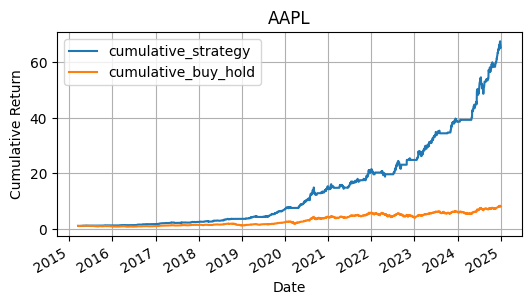

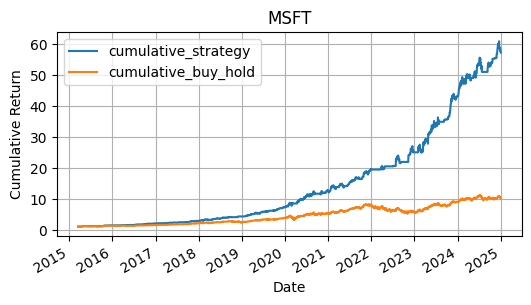

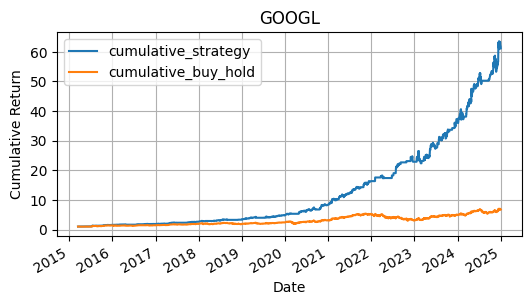

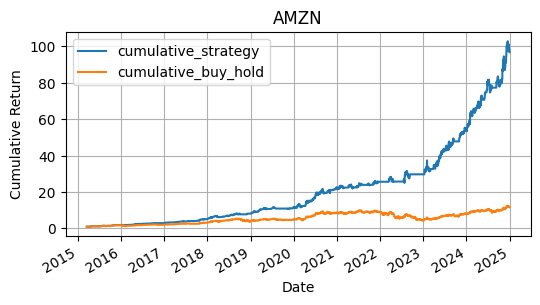

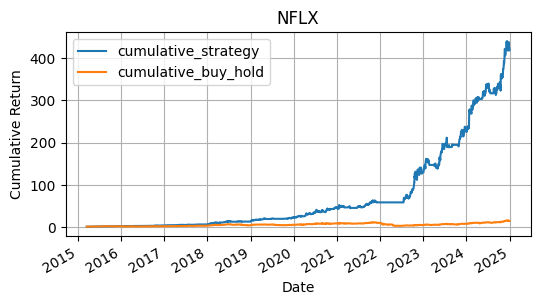

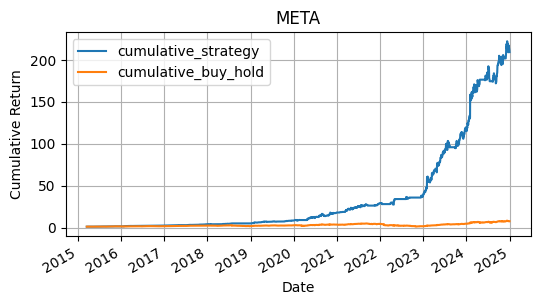

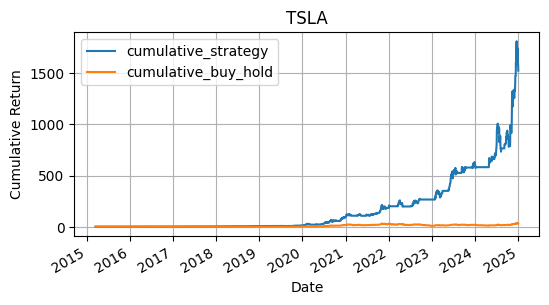

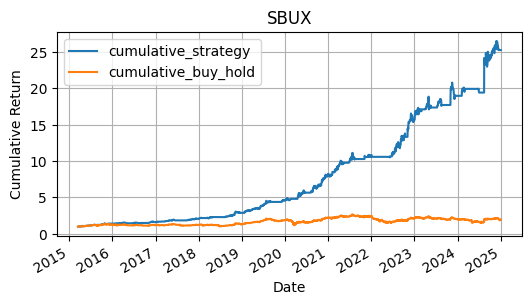

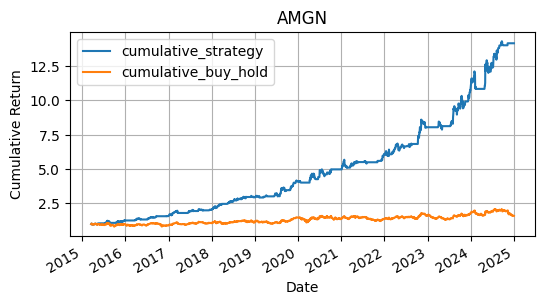

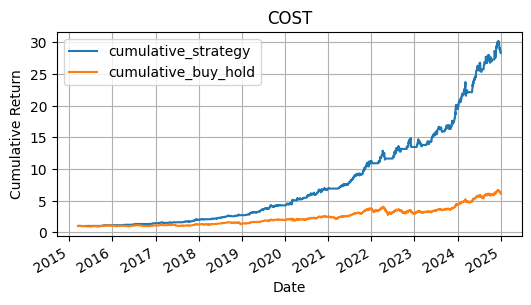

In [ ]:
import matplotlib.pyplot as plt

# Dictionary to hold backtest results
strategy_returns = {}
buy_hold_returns = {}

# Loop through each ticker
for ticker, df in signal_data.items():
    # Daily returns
    df['daily_return'] = df['close'].pct_change()

    # Strategy: apply return only when signal == 1
    df['strategy_return'] = df['daily_return'] * df['signal']

    # Cumulative returns
    df['cumulative_strategy'] = (1 + df['strategy_return']).cumprod()
    df['cumulative_buy_hold'] = (1 + df['daily_return']).cumprod()

    # Save final cumulative values
    strategy_returns[ticker] = df['cumulative_strategy'].iloc[-1]
    buy_hold_returns[ticker] = df['cumulative_buy_hold'].iloc[-1]

    # Optional: plot strategy vs buy & hold
    df[['cumulative_strategy', 'cumulative_buy_hold']].plot(figsize=(6, 3), title=ticker)
    plt.ylabel("Cumulative Return")
    plt.grid(True)
    plt.show()

<ipython-input-12-29a7a10caaf6>:36: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 0.01133501 -0.00778331 -0.01223721  0.01016518 -0.00408805 -0.02620777
  0.00713359 -0.00804894  0.02531646 -0.01519468 -0.0016072   0.00869285
  0.01627833 -0.01067839 -0.0031746   0.00764331  0.00410872 -0.00188857
 -0.00441501  0.00411783]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[i + 1:i + HOLD_DAYS + 1, df.columns.get_loc('strategy_return_sl_tp')] = df['daily_return'].iloc[i + 1:i + HOLD_DAYS + 1]


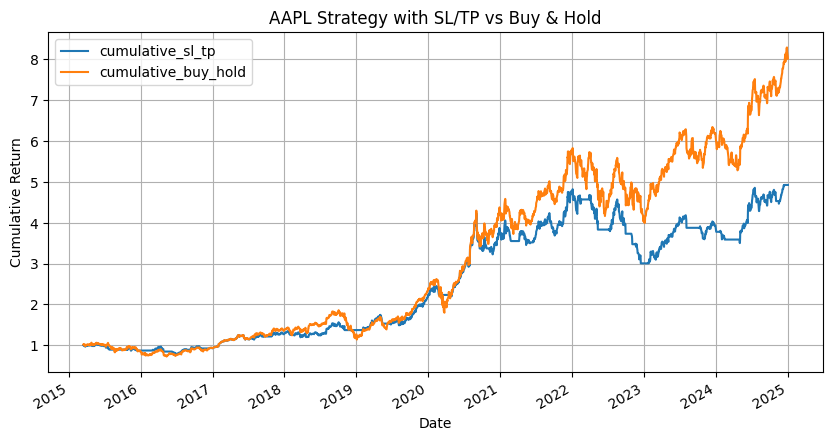

In [ ]:
import numpy as np
import pandas as pd

# Reload AAPL dataframe
df = signal_data['AAPL'].copy()
df['daily_return'] = df['close'].pct_change()
df.dropna(inplace=True)

# Parameters
SL = -0.05  # Stop-Loss = -5%
TP = 0.1   # Take-Profit = +10%
HOLD_DAYS = 20

# Create a placeholder column for the SL/TP strategy
df['strategy_return_sl_tp'] = 0
dates = df.index.to_list()
n = len(df)

# Loop through signals only
i = 0
while i < n - HOLD_DAYS:
    if df['signal'].iloc[i] == 1:
        entry_price = df['close'].iloc[i]
        exited = False
        for j in range(1, HOLD_DAYS + 1):
            if i + j >= n:
                break
            future_price = df['close'].iloc[i + j]
            ret = (future_price - entry_price) / entry_price
            if ret <= SL or ret >= TP:
                df.iloc[i + 1:i + j + 1, df.columns.get_loc('strategy_return_sl_tp')] = df['daily_return'].iloc[i + 1:i + j + 1]
                i = i + j
                exited = True
                break
        if not exited:
            df.iloc[i + 1:i + HOLD_DAYS + 1, df.columns.get_loc('strategy_return_sl_tp')] = df['daily_return'].iloc[i + 1:i + HOLD_DAYS + 1]
            i += HOLD_DAYS
    else:
        i += 1

# Compute cumulative returns
df['cumulative_sl_tp'] = (1 + df['strategy_return_sl_tp']).cumprod()
df['cumulative_buy_hold'] = (1 + df['daily_return']).cumprod()

# Plot
import matplotlib.pyplot as plt
df[['cumulative_sl_tp', 'cumulative_buy_hold']].plot(figsize=(10, 5), title='AAPL Strategy with SL/TP vs Buy & Hold')
plt.ylabel("Cumulative Return")
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
# Parameters
SL = -0.1    # Stop-Loss
TP = 0.20     # Take-Profit
HOLD_DAYS = 10
# Store cumulative returns for all stocks
sl_tp_results = {}

for ticker, df_raw in signal_data.items():
    df = df_raw.copy()
    df['daily_return'] = df['close'].pct_change()
    df['strategy_return_sl_tp'] = 0

    # Loop-based SL/TP logic (same as AAPL)
    i = 0
    while i < len(df) - HOLD_DAYS:
        if df['signal'].iloc[i] == 1:
            entry_price = df['close'].iloc[i]
            exited = False
            for j in range(1, HOLD_DAYS + 1):
                if i + j >= len(df):
                    break
                future_price = df['close'].iloc[i + j]
                ret = (future_price - entry_price) / entry_price
                if ret <= SL or ret >= TP:
                    df.iloc[i + 1:i + j + 1, df.columns.get_loc('strategy_return_sl_tp')] = df['daily_return'].iloc[i + 1:i + j + 1]
                    i = i + j
                    exited = True
                    break
            if not exited:
                df.iloc[i + 1:i + HOLD_DAYS + 1, df.columns.get_loc('strategy_return_sl_tp')] = df['daily_return'].iloc[i + 1:i + HOLD_DAYS + 1]
                i += HOLD_DAYS
        else:
            i += 1

    # Compute cumulative returns
    df['cumulative_sl_tp'] = (1 + df['strategy_return_sl_tp']).cumprod()
    df['cumulative_buy_hold'] = (1 + df['daily_return']).cumprod()

    # Save to dictionary
    sl_tp_results[ticker] = df
    print(f"✅ Processed SL/TP for {ticker}")

<ipython-input-13-1f77a7d9bffb>:32: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 0.01664533  0.01133501 -0.00778331 -0.01223721  0.01016518 -0.00408805
 -0.02620777  0.00713359 -0.00804894  0.02531646]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[i + 1:i + HOLD_DAYS + 1, df.columns.get_loc('strategy_return_sl_tp')] = df['daily_return'].iloc[i + 1:i + HOLD_DAYS + 1]


✅ Processed SL/TP for AAPL
✅ Processed SL/TP for MSFT


<ipython-input-13-1f77a7d9bffb>:32: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[-0.00652529  0.00821018  0.00837599  0.10452238  0.00334239  0.02352696
 -0.00203417 -0.00856095  0.00041118 -0.00863132]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[i + 1:i + HOLD_DAYS + 1, df.columns.get_loc('strategy_return_sl_tp')] = df['daily_return'].iloc[i + 1:i + HOLD_DAYS + 1]
<ipython-input-13-1f77a7d9bffb>:32: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[-0.00712251  0.01542324 -0.00459202  0.00248403  0.00070796  0.02157764
 -0.0183518  -0.00599647 -0.01064585  0.00645624]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[i + 1:i + HOLD_DAYS + 1, df.columns.get_loc('strategy_return_sl_tp')] = df['daily_return'].iloc[i + 1:i + H

✅ Processed SL/TP for GOOGL
✅ Processed SL/TP for AMZN


<ipython-input-13-1f77a7d9bffb>:32: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[-0.00374933  0.00860215 -0.00533049  0.01393355 -0.00845666 -0.00319829
 -0.00802139 -0.0097035   0.00870985  0.01079331]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[i + 1:i + HOLD_DAYS + 1, df.columns.get_loc('strategy_return_sl_tp')] = df['daily_return'].iloc[i + 1:i + HOLD_DAYS + 1]
<ipython-input-13-1f77a7d9bffb>:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.18212603 0.0169386 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[i + 1:i + j + 1, df.columns.get_loc('strategy_return_sl_tp')] = df['daily_return'].iloc[i + 1:i + j + 1]


✅ Processed SL/TP for NFLX


<ipython-input-13-1f77a7d9bffb>:32: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 0.01652363  0.01953125  0.02274132  0.01268882  0.0075179   0.01042284
 -0.02801547  0.00108538  0.00349355 -0.00132053]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[i + 1:i + HOLD_DAYS + 1, df.columns.get_loc('strategy_return_sl_tp')] = df['daily_return'].iloc[i + 1:i + HOLD_DAYS + 1]


✅ Processed SL/TP for META
✅ Processed SL/TP for TSLA


<ipython-input-13-1f77a7d9bffb>:32: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 0.01228324  0.00356888 -0.00497866 -0.01143674  0.0021692  -0.00577201
  0.00072569 -0.00797679  0.02046784  0.04799427]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[i + 1:i + HOLD_DAYS + 1, df.columns.get_loc('strategy_return_sl_tp')] = df['daily_return'].iloc[i + 1:i + HOLD_DAYS + 1]
<ipython-input-13-1f77a7d9bffb>:32: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 0.00361548  0.01546938  0.02003339 -0.00306874 -0.00082085  0.00554529
 -0.02205882 -0.00710109 -0.00021035  0.0096781 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[i + 1:i + HOLD_DAYS + 1, df.columns.get_loc('strategy_return_sl_tp')] = df['daily_return'].iloc[i + 1:i + H

✅ Processed SL/TP for SBUX
✅ Processed SL/TP for AMGN


<ipython-input-13-1f77a7d9bffb>:32: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 0.00024535  0.02127921  0.01543173  0.00585418 -0.02092887 -0.00318242
 -0.03246792 -0.00043581  0.01270632  0.01057876]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[i + 1:i + HOLD_DAYS + 1, df.columns.get_loc('strategy_return_sl_tp')] = df['daily_return'].iloc[i + 1:i + HOLD_DAYS + 1]
<ipython-input-13-1f77a7d9bffb>:32: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 0.00026668  0.0059988   0.00251772  0.00845945  0.00222819  0.00137318
 -0.01338644 -0.00681713  0.00273224  0.0126271 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[i + 1:i + HOLD_DAYS + 1, df.columns.get_loc('strategy_return_sl_tp')] = df['daily_return'].iloc[i + 1:i + H

✅ Processed SL/TP for COST


<Axes: xlabel='Date'>

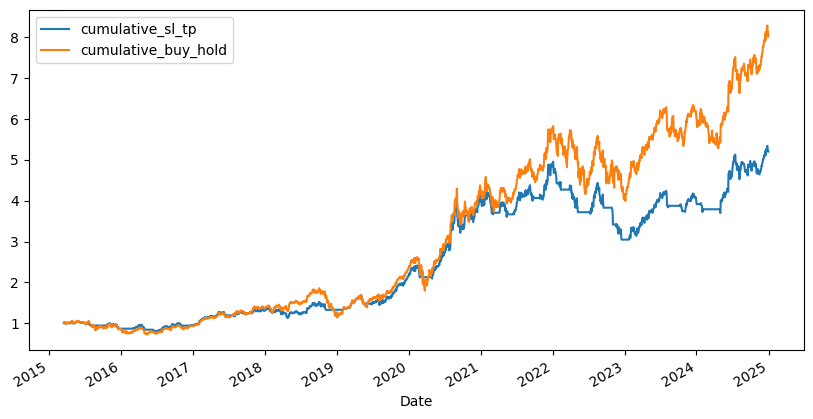

In [ ]:
sl_tp_results['AAPL'][['cumulative_sl_tp', 'cumulative_buy_hold']].plot(figsize=(10,5))

<Axes: xlabel='Date'>

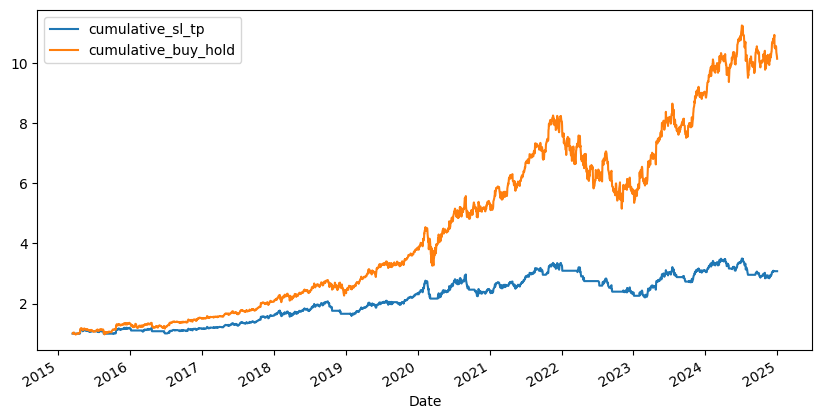

In [ ]:
sl_tp_results['MSFT'][['cumulative_sl_tp', 'cumulative_buy_hold']].plot(figsize=(10,5))

<Axes: xlabel='Date'>

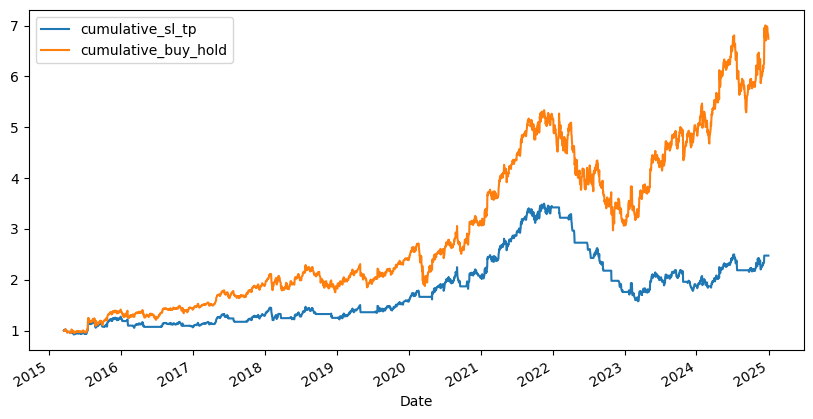

In [ ]:
sl_tp_results['GOOGL'][['cumulative_sl_tp', 'cumulative_buy_hold']].plot(figsize=(10,5))

<Axes: xlabel='Date'>

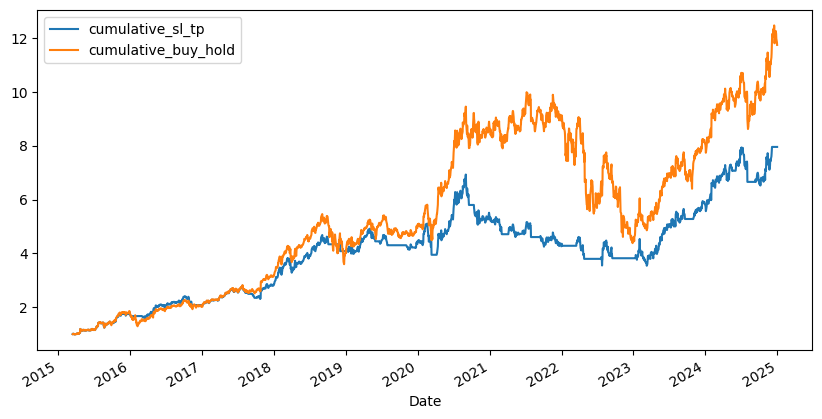

In [ ]:
sl_tp_results['AMZN'][['cumulative_sl_tp', 'cumulative_buy_hold']].plot(figsize=(10,5))

<Axes: xlabel='Date'>

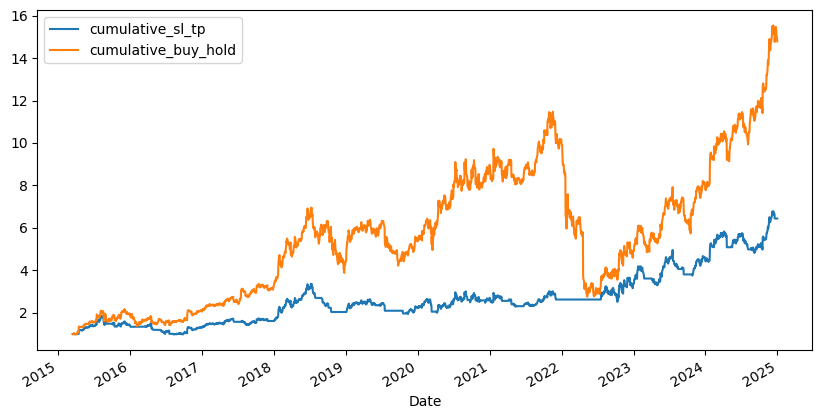

In [ ]:
sl_tp_results['NFLX'][['cumulative_sl_tp', 'cumulative_buy_hold']].plot(figsize=(10,5))

<Axes: xlabel='Date'>

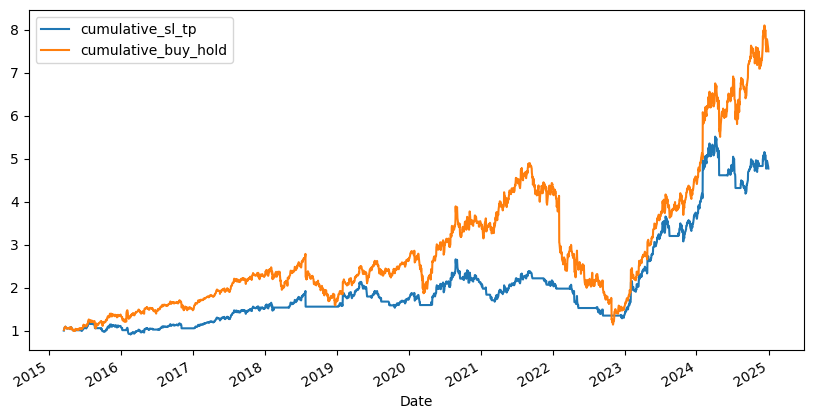

In [ ]:
sl_tp_results['META'][['cumulative_sl_tp', 'cumulative_buy_hold']].plot(figsize=(10,5))

<Axes: xlabel='Date'>

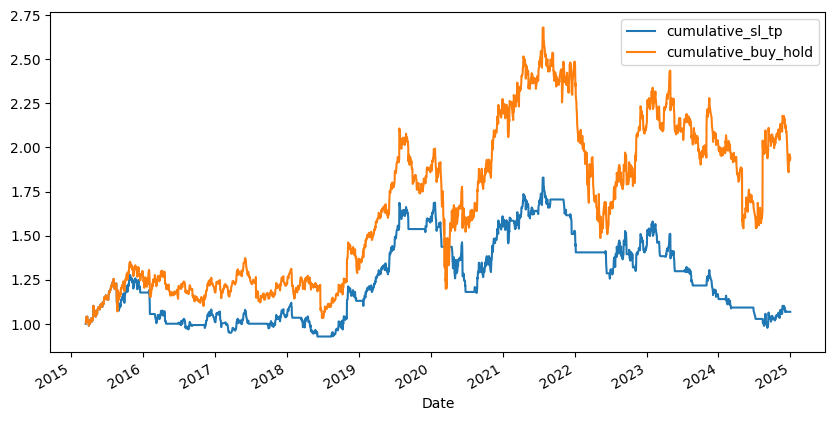

In [ ]:
sl_tp_results['SBUX'][['cumulative_sl_tp', 'cumulative_buy_hold']].plot(figsize=(10,5))

<Axes: xlabel='Date'>

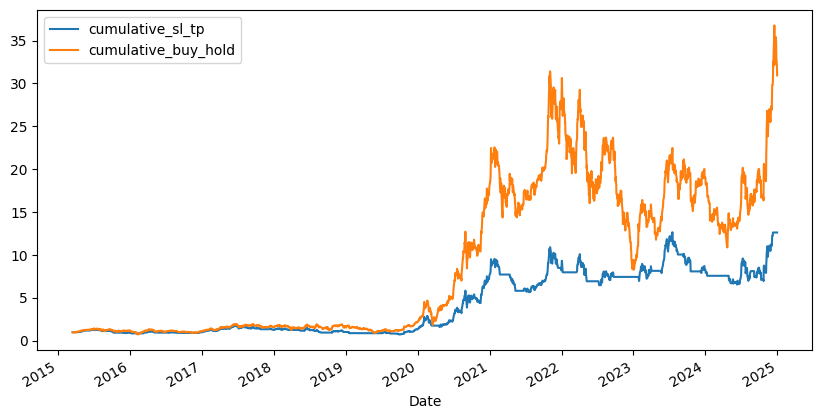

In [ ]:
sl_tp_results['TSLA'][['cumulative_sl_tp', 'cumulative_buy_hold']].plot(figsize=(10,5))

<Axes: xlabel='Date'>

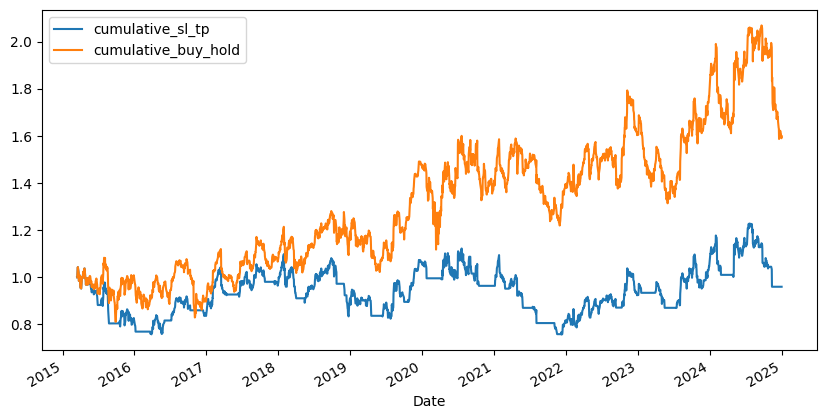

In [ ]:
sl_tp_results['AMGN'][['cumulative_sl_tp', 'cumulative_buy_hold']].plot(figsize=(10,5))

<Axes: xlabel='Date'>

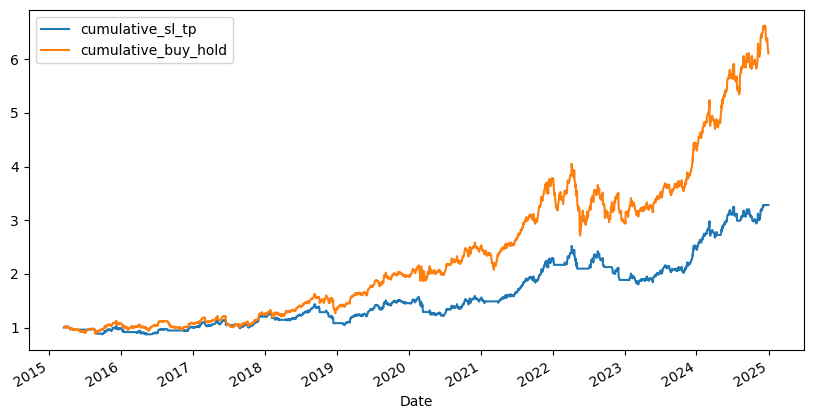

In [ ]:
sl_tp_results['COST'][['cumulative_sl_tp', 'cumulative_buy_hold']].plot(figsize=(10,5))

<Axes: xlabel='Date'>

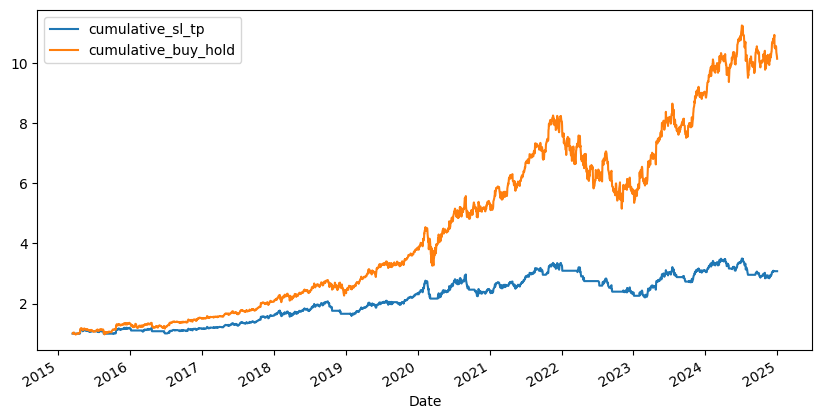

In [ ]:
sl_tp_results['MSFT'][['cumulative_sl_tp', 'cumulative_buy_hold']].plot(figsize=(10,5))

In [ ]:
SL = -0.1  # Stop-Loss
TP = 0.20   # Take-Profit

df = signal_data['AAPL'].copy()
df['daily_return'] = df['close'].pct_change()
df['strategy_return_sl_tp'] = 0

in_trade = False
entry_price = 0

for i in range(1, len(df)):
    if not in_trade and df['signal'].iloc[i - 1] == 1:
        # Enter trade
        in_trade = True
        entry_price = df['close'].iloc[i - 1]

    if in_trade:
        # Calculate return since entry
        current_price = df['close'].iloc[i]
        ret = (current_price - entry_price) / entry_price

        if ret <= SL or ret >= TP or df['signal'].iloc[i] == 0:
            # Exit trade
            in_trade = False

        else:
            # Stay in trade and apply return
            df.at[df.index[i], 'strategy_return_sl_tp'] = df['daily_return'].iloc[i]

# Cumulative return
df['cumulative_sl_tp'] = (1 + df['strategy_return_sl_tp']).cumprod()
df['cumulative_buy_hold'] = (1 + df['daily_return']).cumprod()

# Plot
import matplotlib.pyplot as plt
df[['cumulative_sl_tp', 'cumulative_buy_hold']].plot(figsize=(10, 5), title='AAPL: SL/TP without HOLD_DAYS vs Buy & Hold')
plt.ylabel("Cumulative Return")
plt.grid(True)
plt.show()

In [ ]:
# Set final SL/TP values (optimized)
SL = -0.1    # Stop-Loss at -10%
TP = 0.2    # Take-Profit at +20%

# Store results in a new dictionary
sl_tp_dynamic_results = {}

for ticker, df_raw in signal_data.items():
    df = df_raw.copy()
    df['daily_return'] = df['close'].pct_change()
    df['strategy_return_sl_tp_dynamic'] = 0

    in_trade = False
    entry_price = 0

    for i in range(1, len(df)):
        if not in_trade and df['signal'].iloc[i - 1] == 1:
            in_trade = True
            entry_price = df['close'].iloc[i - 1]

        if in_trade:
            current_price = df['close'].iloc[i]
            ret = (current_price - entry_price) / entry_price

            if ret <= SL or ret >= TP or df['signal'].iloc[i] == 0:
                in_trade = False
            else:
                df.at[df.index[i], 'strategy_return_sl_tp_dynamic'] = df['daily_return'].iloc[i]

    # Compute cumulative return
    df['cumulative_sl_tp_dynamic'] = (1 + df['strategy_return_sl_tp_dynamic']).cumprod()
    df['cumulative_buy_hold'] = (1 + df['daily_return']).cumprod()

    # Store results
    sl_tp_dynamic_results[ticker] = df
    print(f"✅ Final SL/TP without HOLD_DAYS completed for {ticker}")

<ipython-input-14-04c1de7fcf94>:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.016645326504481472' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[df.index[i], 'strategy_return_sl_tp_dynamic'] = df['daily_return'].iloc[i]


✅ Final SL/TP without HOLD_DAYS completed for AAPL


<ipython-input-14-04c1de7fcf94>:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.008375988832014958' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[df.index[i], 'strategy_return_sl_tp_dynamic'] = df['daily_return'].iloc[i]


✅ Final SL/TP without HOLD_DAYS completed for MSFT


<ipython-input-14-04c1de7fcf94>:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.00712250712250706' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[df.index[i], 'strategy_return_sl_tp_dynamic'] = df['daily_return'].iloc[i]


✅ Final SL/TP without HOLD_DAYS completed for GOOGL


<ipython-input-14-04c1de7fcf94>:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.003749330476700563' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[df.index[i], 'strategy_return_sl_tp_dynamic'] = df['daily_return'].iloc[i]


✅ Final SL/TP without HOLD_DAYS completed for AMZN


<ipython-input-14-04c1de7fcf94>:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.1821260306242638' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[df.index[i], 'strategy_return_sl_tp_dynamic'] = df['daily_return'].iloc[i]


✅ Final SL/TP without HOLD_DAYS completed for NFLX


<ipython-input-14-04c1de7fcf94>:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.016523632637376773' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[df.index[i], 'strategy_return_sl_tp_dynamic'] = df['daily_return'].iloc[i]


✅ Final SL/TP without HOLD_DAYS completed for META
✅ Final SL/TP without HOLD_DAYS completed for TSLA


<ipython-input-14-04c1de7fcf94>:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.012283236994219626' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[df.index[i], 'strategy_return_sl_tp_dynamic'] = df['daily_return'].iloc[i]
<ipython-input-14-04c1de7fcf94>:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.003615482773287937' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[df.index[i], 'strategy_return_sl_tp_dynamic'] = df['daily_return'].iloc[i]


✅ Final SL/TP without HOLD_DAYS completed for SBUX
✅ Final SL/TP without HOLD_DAYS completed for AMGN


<ipython-input-14-04c1de7fcf94>:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.00024535361589883564' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[df.index[i], 'strategy_return_sl_tp_dynamic'] = df['daily_return'].iloc[i]
<ipython-input-14-04c1de7fcf94>:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.0002666844456296058' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[df.index[i], 'strategy_return_sl_tp_dynamic'] = df['daily_return'].iloc[i]


✅ Final SL/TP without HOLD_DAYS completed for COST


<Axes: title={'center': 'AAPL Final SL/TP vs Buy & Hold'}, xlabel='Date'>

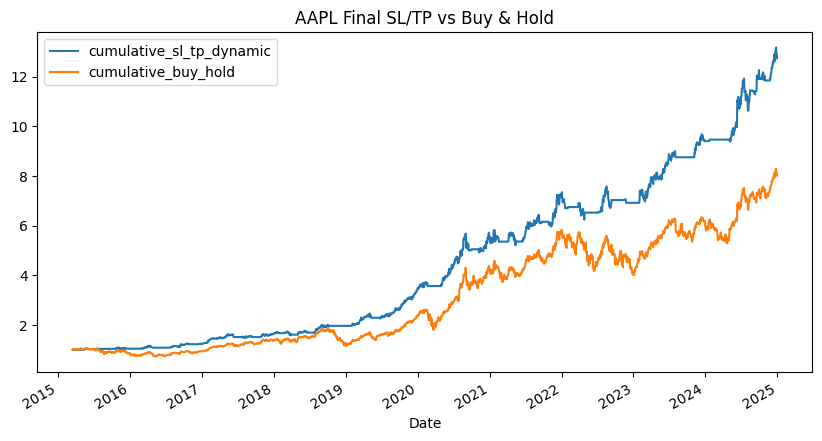

In [ ]:
sl_tp_dynamic_results['AAPL'][['cumulative_sl_tp_dynamic', 'cumulative_buy_hold']].plot(figsize=(10,5), title='AAPL Final SL/TP vs Buy & Hold')

In [ ]:
sl_tp_dynamic_results['AAPL'].columns

Index(['close', 'return_30', 'ma20', 'ma50', 'rsi', 'signal_return',
       'signal_ma', 'signal_rsi', 'signal', 'daily_return', 'strategy_return',
       'cumulative_strategy', 'cumulative_buy_hold',
       'strategy_return_sl_tp_dynamic', 'cumulative_sl_tp_dynamic'],
      dtype='object')

In [ ]:
import pandas as pd

# List of tickers used in the project
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NFLX', 'META', 'TSLA', 'SBUX', 'AMGN', 'COST']

# Build the summary list
strategy_summary = []

for ticker in tickers:
    row = {
        'Ticker': ticker,
        'Buy & Hold': signal_data[ticker]['cumulative_buy_hold'].iloc[-1],
        'Momentum Only': signal_data[ticker]['cumulative_strategy'].iloc[-1],
        'SL/TP + HOLD_DAYS': sl_tp_results[ticker]['cumulative_sl_tp'].iloc[-1],
        'SL/TP Final (No Hold)': sl_tp_dynamic_results[ticker]['cumulative_sl_tp_dynamic'].iloc[-1]
    }
    strategy_summary.append(row)

# Convert to DataFrame and format
summary_df = pd.DataFrame(strategy_summary)
summary_df = summary_df.set_index('Ticker').round(2)

display(summary_df)

,Buy & Hold,Momentum Only,SL/TP + HOLD_DAYS,SL/TP Final (No Hold)
Ticker,,,,
AAPL,8.02,65.33,5.20,12.74
MSFT,10.14,57.35,3.38,9.72
GOOGL,6.74,61.15,1.94,8.56
AMZN,11.75,96.86,5.15,14.88
NFLX,14.79,418.21,7.93,17.22
META,7.50,209.02,4.68,17.21
TSLA,30.95,1523.65,15.24,54.66
SBUX,1.94,25.25,1.11,4.64
AMGN,1.60,14.15,0.85,3.36


In [ ]:
from datetime import datetime
import pandas as pd
# Define key dates
pre_covid_date = pd.to_datetime('2020-02-14')
covid_bottom_date = pd.to_datetime('2020-03-23')

# Dictionary to store results
recovery_info = []

for ticker in combined_prices.columns:
    df = combined_prices[[ticker]].copy()
    df = df.dropna()

    if pre_covid_date not in df.index or covid_bottom_date not in df.index:
        continue  # skip if dates missing

    # Get Feb 14 price
    pre_covid_price = df.loc[pre_covid_date, ticker]

    # Slice from March 24 onwards
    df_recovery = df.loc[df.index > covid_bottom_date]

    # Find first date where price recovers to pre-COVID level
    recovered = df_recovery[df_recovery[ticker] >= pre_covid_price]

    if not recovered.empty:
        recovery_date = recovered.index[0]
        days_to_recover = (recovery_date - covid_bottom_date).days
        recovery_info.append({
            'Ticker': ticker,
            'Pre-COVID Price (Feb 14)': round(pre_covid_price, 2),
            'Recovery Date': recovery_date.date(),
            'Days to Recover': days_to_recover
        })
    else:
        recovery_info.append({
            'Ticker': ticker,
            'Pre-COVID Price (Feb 14)': round(pre_covid_price, 2),
            'Recovery Date': 'Not Recovered',
            'Days to Recover': 'N/A'
        })

# Display summary
recovery_df = pd.DataFrame(recovery_info).sort_values(by='Days to Recover', na_position='last')
display(recovery_df)

,Ticker,Pre-COVID Price (Feb 14),Recovery Date,Days to Recover
3,AMZN,106.74,2020-04-13,21
4,NFLX,380.40,2020-04-13,21
8,AMGN,223.48,2020-04-14,22
9,COST,318.31,2020-04-16,24
6,TSLA,53.34,2020-04-29,37
1,MSFT,185.35,2020-05-11,49
5,META,214.18,2020-05-19,57
0,AAPL,81.24,2020-06-03,72
2,GOOGL,75.94,2020-07-10,109
7,SBUX,89.28,2020-10-08,199


In [ ]:

import pandas as pd
import numpy as np

# Evaluation function for Sharpe Ratio and Max Drawdown
def evaluate_strategy(df, return_col):
    daily_returns = df[return_col].dropna()
    sharpe_ratio = (daily_returns.mean() / daily_returns.std()) * np.sqrt(252)  # Annualized
    cumulative = (1 + daily_returns).cumprod()
    running_max = cumulative.cummax()
    drawdown = (cumulative - running_max) / running_max
    max_drawdown = drawdown.min()
    return sharpe_ratio, max_drawdown

# Tickers in your analysis
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NFLX', 'META', 'TSLA', 'SBUX', 'AMGN', 'COST']

# Collect results for all strategies
evaluation_results = []

for ticker in tickers:
    row = {'Ticker': ticker}

    # Buy & Hold
    sr_bh, mdd_bh = evaluate_strategy(signal_data[ticker], 'daily_return')
    row['Sharpe: Buy & Hold'] = round(sr_bh, 2)
    row['MaxDD: Buy & Hold'] = round(mdd_bh, 2)

    # Momentum Only
    sr_mom, mdd_mom = evaluate_strategy(signal_data[ticker], 'strategy_return')
    row['Sharpe: Momentum'] = round(sr_mom, 2)
    row['MaxDD: Momentum'] = round(mdd_mom, 2)

    # SL/TP with HOLD_DAYS
    sr_hold, mdd_hold = evaluate_strategy(sl_tp_results[ticker], 'strategy_return_sl_tp')
    row['Sharpe: SL/TP + Hold'] = round(sr_hold, 2)
    row['MaxDD: SL/TP + Hold'] = round(mdd_hold, 2)

    # SL/TP Final (No Hold)
    sr_final, mdd_final = evaluate_strategy(sl_tp_dynamic_results[ticker], 'strategy_return_sl_tp_dynamic')
    row['Sharpe: SL/TP Final'] = round(sr_final, 2)
    row['MaxDD: SL/TP Final'] = round(mdd_final, 2)

    evaluation_results.append(row)

# Create DataFrame
evaluation_df = pd.DataFrame(evaluation_results).set_index('Ticker')

# Show the table
display(evaluation_df)


,Sharpe: Buy & Hold,MaxDD: Buy & Hold,Sharpe: Momentum,MaxDD: Momentum,Sharpe: SL/TP + Hold,MaxDD: SL/TP + Hold,Sharpe: SL/TP Final,MaxDD: SL/TP Final
Ticker,,,,,,,,
AAPL,0.89,-0.39,2.44,-0.18,0.92,-0.39,1.66,-0.15
MSFT,1.01,-0.38,2.34,-0.11,0.70,-0.27,1.46,-0.15
GOOGL,0.83,-0.44,2.18,-0.16,0.41,-0.55,1.33,-0.18
AMZN,0.93,-0.56,2.16,-0.16,0.79,-0.56,1.43,-0.22
NFLX,0.85,-0.76,2.15,-0.18,0.80,-0.44,1.21,-0.23
META,0.74,-0.77,2.31,-0.16,0.71,-0.53,1.56,-0.17
TSLA,0.90,-0.74,2.02,-0.36,0.86,-0.54,1.39,-0.25
SBUX,0.38,-0.45,1.92,-0.11,0.15,-0.42,1.16,-0.18
AMGN,0.32,-0.27,1.78,-0.12,0.00,-0.43,0.93,-0.14


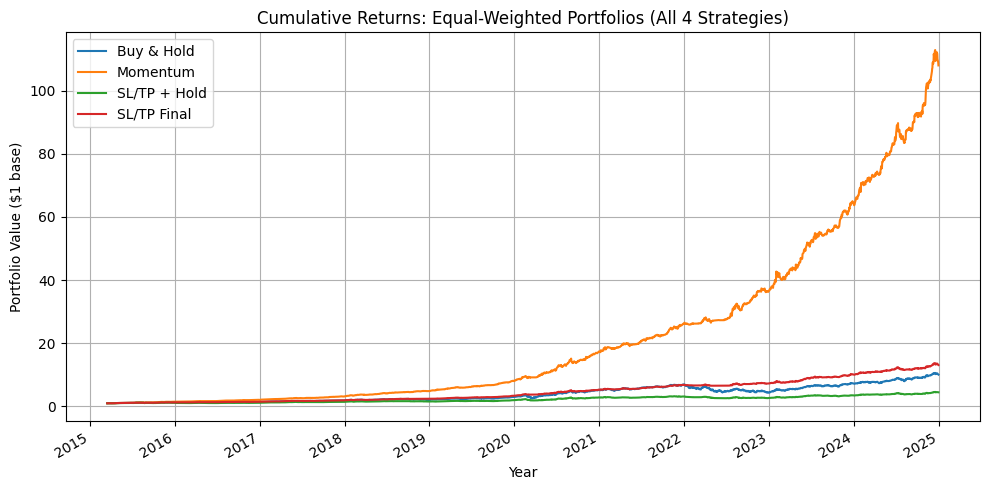

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Initialize DataFrames for each strategy
returns_bh = pd.DataFrame()
returns_momentum = pd.DataFrame()
returns_sl_tp_hold = pd.DataFrame()
returns_sl_tp_final = pd.DataFrame()

# Loop through each ticker to collect strategy returns
for ticker in signal_data.keys():
    # Buy & Hold
    bh = signal_data[ticker][['daily_return']].rename(columns={'daily_return': ticker})

    # Momentum Only
    mom = signal_data[ticker][['strategy_return']].rename(columns={'strategy_return': ticker})

    # SL/TP + Hold Days
    sltp_hold = sl_tp_results[ticker][['strategy_return_sl_tp']].rename(columns={'strategy_return_sl_tp': ticker})

    # SL/TP Final (No Hold Days)
    sltp_final = sl_tp_dynamic_results[ticker][['strategy_return_sl_tp_dynamic']].rename(columns={'strategy_return_sl_tp_dynamic': ticker})

    # Combine all
    returns_bh = pd.concat([returns_bh, bh], axis=1)
    returns_momentum = pd.concat([returns_momentum, mom], axis=1)
    returns_sl_tp_hold = pd.concat([returns_sl_tp_hold, sltp_hold], axis=1)
    returns_sl_tp_final = pd.concat([returns_sl_tp_final, sltp_final], axis=1)

# Drop rows with any missing values
returns_bh.dropna(inplace=True)
returns_momentum.dropna(inplace=True)
returns_sl_tp_hold.dropna(inplace=True)
returns_sl_tp_final.dropna(inplace=True)

# Calculate equal-weighted daily portfolio returns
portfolio_bh = returns_bh.mean(axis=1)
portfolio_momentum = returns_momentum.mean(axis=1)
portfolio_sl_tp_hold = returns_sl_tp_hold.mean(axis=1)
portfolio_sl_tp_final = returns_sl_tp_final.mean(axis=1)

# Combine cumulative returns into one DataFrame
cumulative_portfolios = pd.DataFrame({
    'Buy & Hold': (1 + portfolio_bh).cumprod(),
    'Momentum': (1 + portfolio_momentum).cumprod(),
    'SL/TP + Hold': (1 + portfolio_sl_tp_hold).cumprod(),
    'SL/TP Final': (1 + portfolio_sl_tp_final).cumprod()
})

# 📈 Plot
cumulative_portfolios.plot(figsize=(10, 5), title="Cumulative Returns: Equal-Weighted Portfolios (All 4 Strategies)", grid=True)
plt.ylabel("Portfolio Value ($1 base)")
plt.xlabel("Year")
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pandas as pd

# Calculate daily returns from the cumulative portfolios
portfolio_returns = cumulative_portfolios.pct_change().dropna()

# Function to compute Sharpe Ratio and Max Drawdown
def evaluate_portfolio(returns):
    sharpe_ratio = (returns.mean() / returns.std()) * np.sqrt(252)  # Annualized Sharpe
    cumulative = (1 + returns).cumprod()
    max_drawdown = ((cumulative / cumulative.cummax()) - 1).min()
    return round(sharpe_ratio, 2), round(max_drawdown, 2)

# Evaluate each portfolio strategy
results = []
for col in portfolio_returns.columns:
    sr, mdd = evaluate_portfolio(portfolio_returns[col])
    results.append({
        'Strategy': col,
        'Sharpe Ratio': sr,
        'Max Drawdown': mdd
    })

# Create and display result table
portfolio_eval_df = pd.DataFrame(results).set_index('Strategy')
display(portfolio_eval_df)


,Sharpe Ratio,Max Drawdown
Strategy,,
Buy & Hold,1.14,-0.38
Momentum,3.91,-0.09
SL/TP + Hold,1.12,-0.20
SL/TP Final,2.51,-0.09


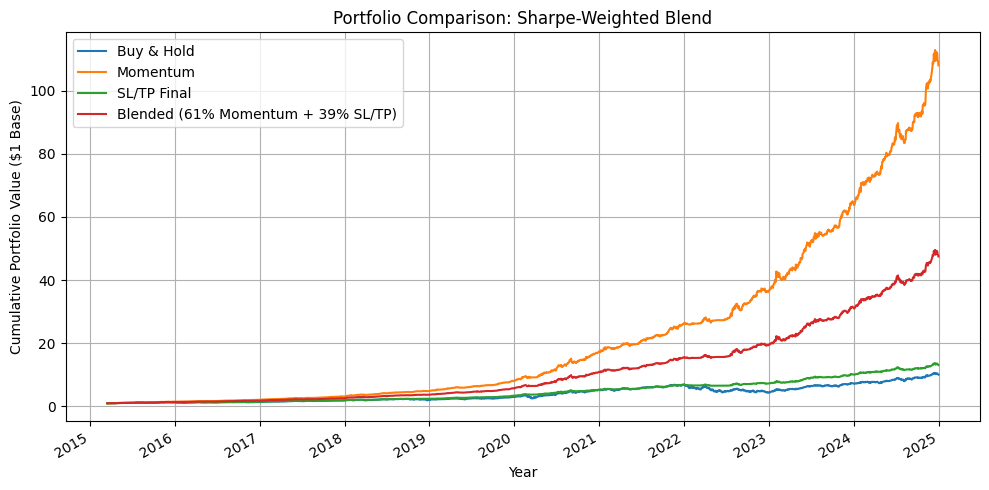

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Step 1: Fetch Sharpe Ratios from previous evaluation DataFrame ---
sharpe_momentum = portfolio_eval_df.loc['Momentum', 'Sharpe Ratio']
sharpe_sltp = portfolio_eval_df.loc['SL/TP Final', 'Sharpe Ratio']

# --- Step 2: Normalize weights based on Sharpe Ratios ---
total_sharpe = sharpe_momentum + sharpe_sltp
w_momentum = sharpe_momentum / total_sharpe
w_sltp = sharpe_sltp / total_sharpe

# --- Step 3: Calculate blended portfolio return ---
blended_return = w_momentum * portfolio_momentum + w_sltp * portfolio_sl_tp_final
blended_cumulative = (1 + blended_return).cumprod()

# --- Step 4: Add all portfolios into one DataFrame ---
all_portfolios = pd.DataFrame({
    'Buy & Hold': (1 + portfolio_bh).cumprod(),
    'Momentum': (1 + portfolio_momentum).cumprod(),
    'SL/TP Final': (1 + portfolio_sl_tp_final).cumprod(),
    f'Blended ({round(w_momentum*100)}% Momentum + {round(w_sltp*100)}% SL/TP)': blended_cumulative
})

# --- Step 5: Plot ---
all_portfolios.plot(figsize=(10, 5), title="Portfolio Comparison: Sharpe-Weighted Blend", grid=True)
plt.ylabel("Cumulative Portfolio Value ($1 Base)")
plt.xlabel("Year")
plt.tight_layout()
plt.show()

In [ ]:
# Compute daily returns from cumulative blended portfolio
blended_return_series = blended_cumulative.pct_change().dropna()

# Function to compute Sharpe Ratio and Max Drawdown
def evaluate_portfolio(returns):
    sharpe_ratio = (returns.mean() / returns.std()) * np.sqrt(252)
    cumulative = (1 + returns).cumprod()
    max_drawdown = ((cumulative / cumulative.cummax()) - 1).min()
    return round(sharpe_ratio, 2), round(max_drawdown, 2)

# Evaluate the blended portfolio
blended_sharpe, blended_maxdd = evaluate_portfolio(blended_return_series)

# Display the results
print(f"📈 Blended Portfolio (61% Momentum + 39% SL/TP Final)")
print(f"Sharpe Ratio: {blended_sharpe}")
print(f"Max Drawdown: {blended_maxdd}")

📈 Blended Portfolio (61% Momentum + 39% SL/TP Final)
Sharpe Ratio: 3.46
Max Drawdown: -0.09


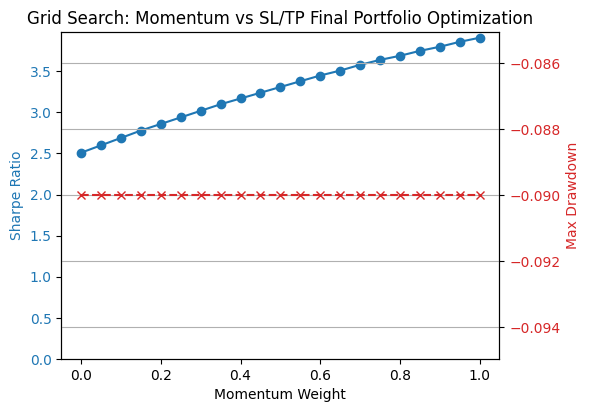

,Momentum Weight,Sharpe Ratio,Max Drawdown
0,0.00,2.51,-0.09
1,0.05,2.60,-0.09
2,0.10,2.69,-0.09
3,0.15,2.78,-0.09
4,0.20,2.86,-0.09
5,0.25,2.94,-0.09
6,0.30,3.02,-0.09
7,0.35,3.10,-0.09
8,0.40,3.17,-0.09
9,0.45,3.24,-0.09


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Prepare to store results
grid_results = []

# Try all combinations: 0% to 100% Momentum in 5% steps
for w in np.arange(0.0, 1.01, 0.05):
    w_momentum = w
    w_sltp = 1 - w

    # Compute blended return and cumulative
    blended = w_momentum * portfolio_momentum + w_sltp * portfolio_sl_tp_final
    cumulative = (1 + blended).cumprod()
    returns = blended.dropna()

    # Evaluate Sharpe and Max Drawdown
    sharpe = (returns.mean() / returns.std()) * np.sqrt(252)
    max_dd = ((cumulative / cumulative.cummax()) - 1).min()

    # Store results
    grid_results.append({
        'Momentum Weight': round(w_momentum, 2),
        'Sharpe Ratio': round(sharpe, 2),
        'Max Drawdown': round(max_dd, 2)
    })

# Create DataFrame of results
grid_df = pd.DataFrame(grid_results)

# Plot Sharpe and Max Drawdown
fig, ax1 = plt.subplots(figsize=(6, 4))

color = 'tab:blue'
ax1.set_xlabel('Momentum Weight')
ax1.set_ylabel('Sharpe Ratio', color=color)
ax1.plot(grid_df['Momentum Weight'], grid_df['Sharpe Ratio'], marker='o', color=color, label='Sharpe Ratio')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(bottom=0)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Max Drawdown', color=color)
ax2.plot(grid_df['Momentum Weight'], grid_df['Max Drawdown'], marker='x', linestyle='--', color=color, label='Max Drawdown')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title("Grid Search: Momentum vs SL/TP Final Portfolio Optimization")
plt.grid(True)
plt.show()

# Display DataFrame for reference
grid_df


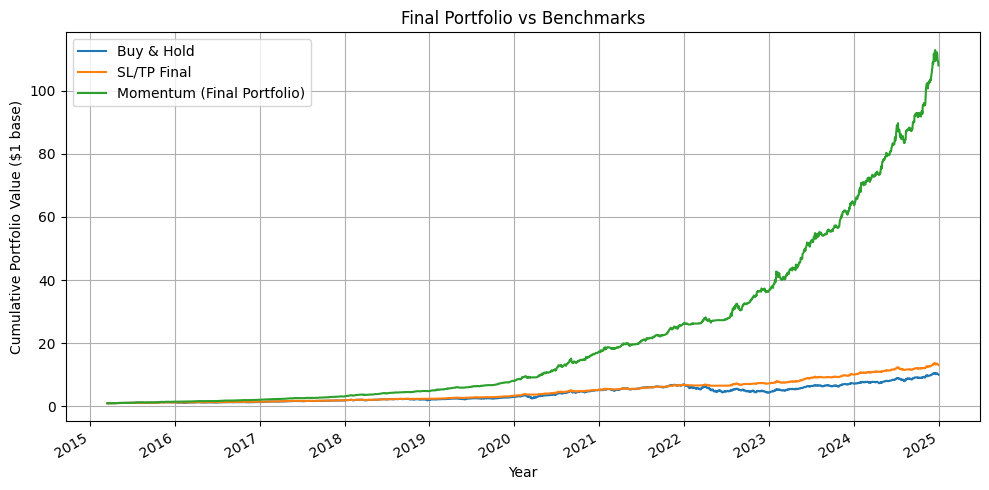

In [ ]:
import matplotlib.pyplot as plt

# Final selected strategy: 100% Momentum
final_portfolio_return = portfolio_momentum
final_cumulative = (1 + final_portfolio_return).cumprod()

# Combine for final comparison
final_plot_df = pd.DataFrame({
    'Buy & Hold': (1 + portfolio_bh).cumprod(),
    'SL/TP Final': (1 + portfolio_sl_tp_final).cumprod(),
    'Momentum (Final Portfolio)': final_cumulative
})

# Plot
final_plot_df.plot(figsize=(10, 5), title="Final Portfolio vs Benchmarks", grid=True)
plt.ylabel("Cumulative Portfolio Value ($1 base)")
plt.xlabel("Year")
plt.tight_layout()
plt.show()
